# Sentiment Analysis of Amazon Reviews

## Methodology

1. Data cleaning
2. Feature extraction
3. Prediction model creation
4. Visualization of results

**Data Cleaning:**
1. Make text lower case: The machine doesn't consider upper case and lower case text as same, therefore we have to convert all upper case to lower ones.
2. Removing punctuations: Punctuations are source of noise in any data, so it is important to remove them all.
3. Removing Urls: If the data has any URLs we have to remove them as well.

**Feature Extraction:**
All of the ratings of 1 & 0 are classified as "0" and postive ratings are classified as "1". Perform tokenization before using the data for predicition model.


**Prediction Model Creation:**
Create deep learning model using Keras API with tensorflow. Sequence processing through 1D-CNN.

**Visualization**
Confusion matrix and plots to understand the accuracy of predicted and trained data.

## Data set used

The data used in this project was downloaded from Kaggle. It was uploded on Kaggle by Adam Bittlingmayer. This dataset consists of few million Amazon customer reviews and ratings. The neutral ratings and corresponding reviews were excluded from the trained dataset. This data set consist classes of negative reviews with ratings of 0 & 1 under "label 1" and positive reviews with ratings of 4 & 5 under "label 2". We have reduced the number down to 99000 for train lines and 11000 for test lines. This step was taken considering the working capacity of our laptops.

### Sentiment Analysis using Deep learning

In [44]:
#import all of the libraries to beused
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import re
from tqdm import tqdm
from sklearn.utils import shuffle
import bz2
from keras.layers import *
from keras.models import Model, Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [47]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

In [45]:
#Give path to the datasets from your device
import os
data = os.listdir("C:/Users/bcs12/Downloads/3dr semester/Data Science/Project/data")
data[0]

'.ipynb_checkpoints'

**Splitting our data into Reviews and labels**

In [48]:
#splitting the reviews and labels in each line
def splitReviewsLabels(lines):
    reviews = []
    labels = []
    for review in tqdm(lines):
        rev = reviewToX(review)
        label = reviewToY(review)
        reviews.append(rev[:512])
        labels.append(label)
    return reviews, labels

In [49]:
AMAZON_REVIEW_DIR = 'C:/Users/bcs12/Downloads/3dr semester/Data Science/Project/data'

**Extracting label from the data**<br>
"0" in case of 1 & 2 rating<br>
"1" in case of 4 & 5 rating

In [50]:
#Assigning 0 for negative reviews & 1 for positive reviews
def reviewToY(review):
    return [1,0] if review.split(' ')[0] == '__label__1' else [0,1]

**Extracting reviews from the data**<br>
**Data cleaning is also done in this process**

In [51]:
#data cleaning is done in this step, converting into lower case,removal of url & punctuation mark
def reviewToX(review):
    review = review.split(' ', 1)[1][:-1].lower()
    review = re.sub('\d','0',review)
    if 'www.' in review or 'http:' in review or 'https:' in review or '.com' in review:
        review = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", review)
    return review

In [52]:
#Upload the datasets from your device using the corresponding path
train_file = bz2.BZ2File(os.path.join(AMAZON_REVIEW_DIR, 'train.ft.txt.bz2'))
test_file = bz2.BZ2File(os.path.join(AMAZON_REVIEW_DIR,'test.ft.txt.bz2'))


In [53]:
#Read lines from given dataset
train_lines = train_file.readlines()
test_lines = test_file.readlines()

In [12]:
#reduce the lines for the given data set
train_lines_reduced = train_lines[0:99000]
test_lines_reduced = test_lines[0:11000]

**Convert from raw binary strings to strings that can be parsed**

In [14]:
#converting the binary strings to the type of strings that can be parsed
train_lines_reduced = [x.decode('utf-8') for x in train_lines_reduced]
test_lines_reduced = [x.decode('utf-8') for x in test_lines_reduced]

In [15]:
#spillting and arranging the reviews
reviews_train, y_train = splitReviewsLabels(train_lines_reduced)
reviews_test, y_test = splitReviewsLabels(test_lines_reduced)

100%|█████████████████████████████████████████████████████████████████████████| 11000/11000 [00:00<00:00, 70023.36it/s]


In [16]:
reviews_train, y_train = shuffle(reviews_train, y_train)
reviews_test, y_test = shuffle(reviews_test, y_test)

In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

**Tokenization**<br>
In this step, sentences are converted into words which can further be used by the prediction model.

In [18]:
#Defining parameters for the process of tokenization
max_features = 8192
maxlen = 128
embed_size = 64

In [19]:
tokenizer = Tokenizer(num_words=max_features)

In [20]:
tokenizer.fit_on_texts(reviews_train)

In [21]:
#converting the texts into the form of bytes
import pickle
with open('tokenizer_convo_sentiment.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
token_train = tokenizer.texts_to_sequences(reviews_train)
token_test = tokenizer.texts_to_sequences(reviews_test)

In [23]:
#making all of the sequences of the same length
x_train = pad_sequences(token_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(token_test, maxlen=maxlen, padding='post')

**Prediction Model**<br>
1D-CNN method for the sentiment analysis of given data set.

In [24]:
#Implementing 1D-CNN method to the trained set of data
input = Input(shape=(maxlen,))
net = Embedding(max_features, embed_size)(input)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)

net = Conv1D(32, 7, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net1 = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)
output = Activation('softmax')(net)
model = Model(inputs = input, outputs = output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [25]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 64)           524288    
_________________________________________________________________
dropout (Dropout)            (None, 128, 64)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 64)           256       
_________________________________________________________________
conv1d (Conv1D)              (None, 128, 32)           14368     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 32)           128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)          

In [26]:
#execting the corresponding model for 10 epochs
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
697/697 [==============================] - 122s 175ms/step - loss: 0.2954 - acc: 0.8743 - val_loss: 0.2391 - val_acc: 0.9070
Epoch 2/10
697/697 [==============================] - 118s 169ms/step - loss: 0.1871 - acc: 0.9274 - val_loss: 0.2408 - val_acc: 0.9015
Epoch 3/10
697/697 [==============================] - 121s 174ms/step - loss: 0.1427 - acc: 0.9462 - val_loss: 0.3065 - val_acc: 0.8936
Epoch 4/10
697/697 [==============================] - 120s 173ms/step - loss: 0.1029 - acc: 0.9625 - val_loss: 0.3460 - val_acc: 0.8837
Epoch 5/10
697/697 [==============================] - 119s 170ms/step - loss: 0.0765 - acc: 0.9726 - val_loss: 0.3494 - val_acc: 0.8972
Epoch 6/10
697/697 [==============================] - 121s 174ms/step - loss: 0.0600 - acc: 0.9784 - val_loss: 0.4189 - val_acc: 0.8972
Epoch 7/10
697/697 [==============================] - 118s 169ms/step - loss: 0.0474 - acc: 0.9830 - val_loss: 0.4430 - val_acc: 0.8969
Epoch 8/10
697/697 [============================

In [27]:
#calculating the accuracy of the given model
accuracy = model.evaluate (x_test, y_test)
print('Test set\n  Loss: {:0.1f}%\n  Accuracy: {:0.1f}%'.format(accuracy[0]*100,accuracy[1]*100))

344/344 [==============================] - 2s 7ms/step - loss: 0.4622 - acc: 0.8999
Test set
  Loss: 46.2%
  Accuracy: 90.0%


**Result:**<br>
The accuracy of this model is **90%** and the loss is calculated to be **46.2%**.

**Visulatization of Results**

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


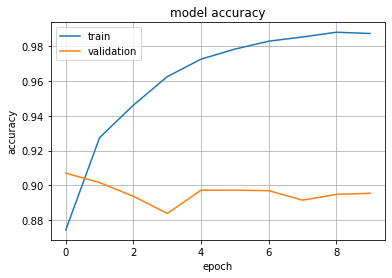

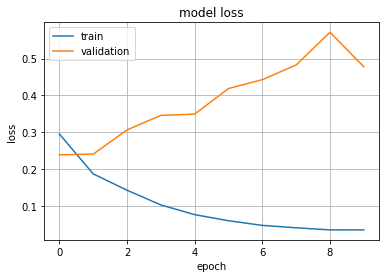

In [29]:
#printing the graphs for accuracy and losses against epochs
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()